# Customer Churn Analysis

## Objective
The objective of this project is to analyze customer churn data from a telcom company to identify key factors associated with customer attribution.The analysis fouses on customer demographics,service usage,contract types,and billing information to support retention-focused business decsions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Data Overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
#  Dataset has an issue:TotalCharges is text
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

# Drop rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"])

## Data Cleaning
The TotalCharges column was converted from text to numeric format.Rows wih missing TotalCharges values were removed to ensure accurate analysis.

In [6]:
churn_counts =df["Churn"].value_counts(normalize=True) * 100
churn_counts

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

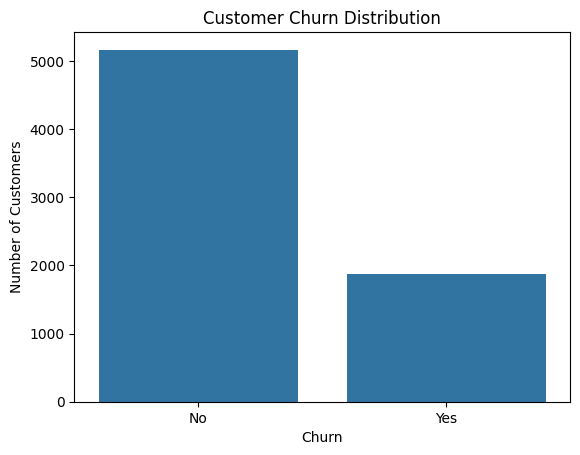

In [7]:
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

## Overall Churn Rate
The bar chart shows the proportion of customers who have churned versus those who have remained. Understanding the overall churn level provides context for evaluating retention performance.

In [8]:
contract_churn = pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100
contract_churn 

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


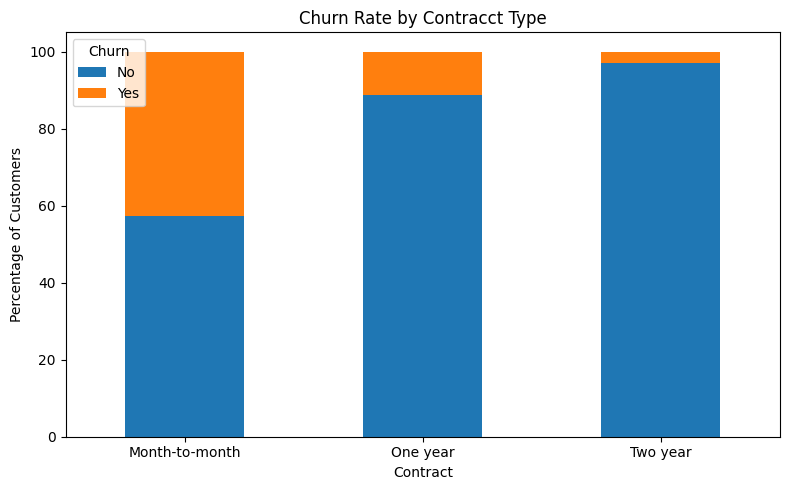

In [9]:
contract_churn.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.title("Churn Rate by Contracct Type")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

## Churn by Contract Type
Customers on month-to-month contracts show significantly higher churn rates compares to customers on long-term contrscts.This suggests that contract length plays a crucial role in customer retention.

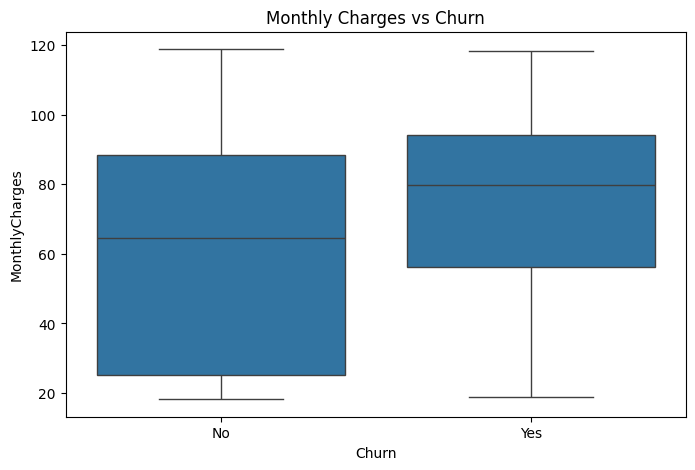

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

## Monthly Charges and Churn
Customers who tend to have higher monthly charges on average.This indicates that pricing and perceived value my influence churn behaviour

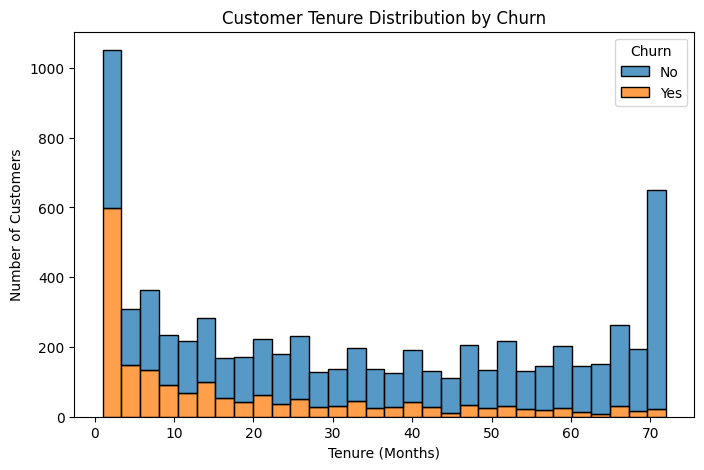

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, multiple="stack")
plt.title("Customer Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

## Customer Tenure and Churn
Churn is more common among customers with shorter tenure.This suggests that early stage customer experience is critical for retention.

## Conclusion
This analysis identified key factors associated with customer churn, including contract type,monthly charges, and customer tenure.The finsings suggest that retention srategies should prioritize month-to-month customers,pricing optimization and improved onboarding experience.